In [8]:
import os
import glob
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from PIL import Image
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
# Create the flat_dataset folder if it doesn't exist
if not os.path.exists('flat_dataset'):
    os.makedirs('flat_dataset/')    

In [5]:
#### Create the Dataset for the regression: layers are flattened to (2500, 8) and bhm to (2500, 1)
folder_path = 'sentinel_layers_500'
# Loop through the files in the folder
for filename in os.listdir(folder_path): 
    if filename.startswith('bhm'):
        print(filename)
        
        # Load the photo_bhm file
        bhm = np.load(os.path.join(folder_path, filename))
        #print(bhm.shape)
        #print(bhm[:,1])
        
        # Create the flat array (2500,1) and initializes it with zeroes
        flat_bhm = np.zeros((2500, 1), dtype=bhm.dtype)
        print(flat_bhm.shape)
        for i in range(2500):   
            flat_bhm[i] = bhm[i//500][i%500]
            
        # For the future: alternative version 
        #my_array.reshape(-1, 8)    
            
        # Construct the output file path
        output_path = os.path.join('flat_dataset/', 'flat_' + filename)
        # Save the flattened data to the output file
        np.save(output_path, flat_bhm)
        # print indices of nonzero elements
        #indices = np.nonzero(flat_bhm) 
        #print(indices)
    
    elif filename.startswith('layer'):
        print(filename)
        
        # Load the layer file
        layer = np.load(os.path.join(folder_path, filename))
        print(layer[:, :, 7])
        print(np.nonzero(layer[:, :, 4]))
        
        #visualize the file
        #combined_image = visualize_8channel_image(os.path.join(folder_path, filename))
        #combined_image.show()
            
            
        # Create the 2-dimensional layer array
        flat_layer = np.zeros((2500, 8), dtype=layer.dtype)       
        for i in range(2500):   
            for k in range(8):
                flat_layer[i][k] = layer[i//500][i%500][k]
                
        # Construct the output file path
        output_path = os.path.join('flat_dataset/', 'flat_' + filename)
        # Save the flattened data to the output file
        np.save(output_path, flat_layer)
        # print indices of nonzero elements
        #indices = np.nonzero(flat_layer) 
        #print(indices)

bhm_3315_s8.npy
(2500, 1)
bhm_3312_s1.npy
(2500, 1)
bhm_3443_s1.npy
(2500, 1)
layers_3433_s4.npy
[[ 89  89  89 ...  72  72  72]
 [ 89  89  89 ...  72  72  72]
 [ 89  89  89 ...  72  72  72]
 ...
 [255 255 255 ... 145 145 145]
 [255 255 255 ... 145 145 145]
 [255 255 255 ... 145 145 145]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3215_s8.npy
(2500, 1)
bhm_3212_s1.npy
(2500, 1)
bhm_4314_s11.npy
(2500, 1)
layers_3324_s14.npy
[[168 168 168 ... 169 169 169]
 [168 168 168 ... 169 169 169]
 [168 168 168 ... 169 169 169]
 ...
 [205 205 205 ... 157 157 157]
 [205 205 205 ... 157 157 157]
 [205 205 205 ... 157 157 157]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3334_s14.npy
[[195 195 195 ... 216 216 216]
 [195 195 195 ... 216 216 216]
 [195 195 195 ... 216 216 216]
 ...
 [113 113 113 ... 138 138 138]
 [113 113 113 ... 138 138 138]
 [113 113 113 ... 138 138 138]]
(array([  0,   0,   0, ..., 49

layers_3332_s8.npy
[[178 178 178 ... 160 160 160]
 [178 178 178 ... 160 160 160]
 [178 178 178 ... 160 160 160]
 ...
 [162 162 162 ... 145 145 145]
 [162 162 162 ... 145 145 145]
 [162 162 162 ... 145 145 145]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3232_s8.npy
[[54 54 54 ... 90 90 90]
 [54 54 54 ... 90 90 90]
 [54 54 54 ... 90 90 90]
 ...
 [57 57 57 ... 53 53 53]
 [57 57 57 ... 53 53 53]
 [57 57 57 ... 53 53 53]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3431_s0.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 176 176 176]
 [  0   0   0 ... 176 176 176]
 [  0   0   0 ... 176 176 176]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([408, 409, 410, ..., 497, 498, 499]))
layers_3436_s9.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [134 134 134 ... 2

layers_3335_s12.npy
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [83 83 83 ... 49 49 49]
 [83 83 83 ... 49 49 49]
 [83 83 83 ... 49 49 49]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([428, 429, 430, ..., 497, 498, 499]))
bhm_3324_s3.npy
(2500, 1)
layers_2242_s10.npy
[[102 102 102 ...  92  92  92]
 [102 102 102 ...  92  92  92]
 [102 102 102 ...  92  92  92]
 ...
 [ 61  61  61 ... 107 107 107]
 [ 61  61  61 ... 107 107 107]
 [ 61  61  61 ... 107 107 107]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_4316_s2.npy
(2500, 1)
bhm_2222_s1.npy
(2500, 1)
bhm_3233_s11.npy
(2500, 1)
bhm_4436_s2.npy
(2500, 1)
bhm_3215_s13.npy
(2500, 1)
layers_3325_s6.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [201 201 201 ... 131 131 131]
 [201 201 201 ... 131 131 131]
 [201 201 201 ... 131 131 131]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([436, 437, 438

layers_3433_s2.npy
[[  0   0   0 ... 184 184 184]
 [  0   0   0 ... 184 184 184]
 [  0   0   0 ... 184 184 184]
 ...
 [  0   0   0 ...  65  65  65]
 [  0   0   0 ...  65  65  65]
 [  0   0   0 ...  65  65  65]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  4,   5,   6, ..., 497, 498, 499]))
layers_3311_s7.npy
[[ 88  88  88 ... 109 109 109]
 [ 88  88  88 ... 109 109 109]
 [ 88  88  88 ... 109 109 109]
 ...
 [ 98  98  98 ... 175 175 175]
 [ 98  98  98 ... 175 175 175]
 [ 98  98  98 ... 175 175 175]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_2242_s4.npy
[[ 88  88  88 ... 179 179 179]
 [ 88  88  88 ... 179 179 179]
 [ 88  88  88 ... 179 179 179]
 ...
 [ 50  50  50 ...  55  55  55]
 [ 50  50  50 ...  55  55  55]
 [ 50  50  50 ...  55  55  55]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3211_s7.npy
[[154 154 154 ... 175 175 175]
 [154 154 154 ... 175 175 175]
 [154 154 154 ... 1

layers_3324_s13.npy
[[105 105 105 ... 165 165 165]
 [105 105 105 ... 165 165 165]
 [105 105 105 ... 165 165 165]
 ...
 [194 194 194 ... 159 159 159]
 [194 194 194 ... 159 159 159]
 [194 194 194 ... 159 159 159]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3334_s13.npy
[[184 184 184 ... 141 141 141]
 [184 184 184 ... 141 141 141]
 [184 184 184 ... 141 141 141]
 ...
 [ 98  98  98 ... 176 176 176]
 [ 98  98  98 ... 176 176 176]
 [ 98  98  98 ... 176 176 176]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3324_s11.npy
[[219 219 219 ... 120 120 120]
 [219 219 219 ... 120 120 120]
 [219 219 219 ... 120 120 120]
 ...
 [159 159 159 ... 158 158 158]
 [159 159 159 ... 158 158 158]
 [159 159 159 ... 158 158 158]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3334_s11.npy
[[238 238 238 ...  96  96  96]
 [238 238 238 ...  96  96  96]
 [238 238 238 .

bhm_4313_s9.npy
(2500, 1)
bhm_3321_s10.npy
(2500, 1)
bhm_3331_s10.npy
(2500, 1)
layers_3436_s11.npy
[[168 168 168 ... 149 149 149]
 [168 168 168 ... 149 149 149]
 [168 168 168 ... 149 149 149]
 ...
 [202 202 202 ... 193 193 193]
 [202 202 202 ... 193 193 193]
 [202 202 202 ... 193 193 193]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3322_s8.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [197 197 197 ... 189 189 189]
 [197 197 197 ... 189 189 189]
 [197 197 197 ... 189 189 189]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3325_s1.npy
[[125 125 125 ... 139 139 139]
 [125 125 125 ... 139 139 139]
 [125 125 125 ... 139 139 139]
 ...
 [  0   0   0 ... 153 153 153]
 [  0   0   0 ... 153 153 153]
 [  0   0   0 ... 153 153 153]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3215_s14.npy
(2

bhm_3436_s6.npy
(2500, 1)
layers_3321_s2.npy
[[  0   0   0 ...  91  91  91]
 [  0   0   0 ...  91  91  91]
 [  0   0   0 ...  91  91  91]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  8,   9,  10, ..., 497, 498, 499]))
layers_3213_s13.npy
[[32 32 32 ...  0  0  0]
 [32 32 32 ...  0  0  0]
 [32 32 32 ...  0  0  0]
 ...
 [77 77 77 ... 55 55 55]
 [77 77 77 ... 55 55 55]
 [77 77 77 ... 55 55 55]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_4313_s3.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [216 216 216 ... 167 167 167]
 [216 216 216 ... 167 167 167]
 [216 216 216 ... 167 167 167]]
(array([  8,   8,   8, ..., 499, 499, 499]), array([172, 173, 174, ..., 497, 498, 499]))
bhm_3322_s2.npy
(2500, 1)
bhm_2224_s0.npy
(2500, 1)
bhm_2324_s0.npy
(2500, 1)
bhm_2324_s1.npy
(2500, 1)
bhm_2

bhm_3443_s10.npy
(2500, 1)
bhm_3433_s9.npy
(2500, 1)
bhm_3216_s10.npy
(2500, 1)
layers_3315_s5.npy
[[178 178 178 ...  71  71  71]
 [178 178 178 ...  71  71  71]
 [178 178 178 ...  71  71  71]
 ...
 [ 58  58  58 ...  94  94  94]
 [ 58  58  58 ...  94  94  94]
 [ 58  58  58 ...  94  94  94]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3434_s0.npy
(2500, 1)
layers_2346_s6.npy
[[  0   0   0 ...  59  59  59]
 [  0   0   0 ...  59  59  59]
 [  0   0   0 ...  59  59  59]
 ...
 [216 216 216 ... 113 113 113]
 [216 216 216 ... 113 113 113]
 [216 216 216 ... 113 113 113]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([360, 361, 362, ..., 497, 498, 499]))
layers_3215_s5.npy
[[58 58 58 ... 93 93 93]
 [58 58 58 ... 93 93 93]
 [58 58 58 ... 93 93 93]
 ...
 [39 39 39 ... 53 53 53]
 [39 39 39 ... 53 53 53]
 [39 39 39 ... 53 53 53]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3213_s9.npy
(2500, 1)
bhm_

bhm_3216_s11.npy
(2500, 1)
layers_2442_s6.npy
[[  0   0   0 ...  50  50  50]
 [  0   0   0 ...  50  50  50]
 [  0   0   0 ...  50  50  50]
 ...
 [ 46  46  46 ... 136 136 136]
 [ 46  46  46 ... 136 136 136]
 [ 46  46  46 ... 136 136 136]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([416, 417, 418, ..., 497, 498, 499]))
bhm_3443_s11.npy
(2500, 1)
layers_3233_s0.npy
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 54 54 54]
 [ 0  0  0 ... 54 54 54]
 [ 0  0  0 ... 54 54 54]]
(array([  8,   8,   8, ..., 499, 499, 499]), array([428, 429, 430, ..., 497, 498, 499]))
layers_3333_s0.npy
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]
 [0 0 0 ... 4 4 4]]
(array([  8,   8,   8, ..., 499, 499, 499]), array([332, 333, 334, ..., 497, 498, 499]))
layers_3334_s9.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [174 174 174 ... 145 145 145]
 [174 

bhm_2324_s6.npy
(2500, 1)
bhm_3322_s4.npy
(2500, 1)
layers_3311_s13.npy
[[165 165 165 ...  95  95  95]
 [165 165 165 ...  95  95  95]
 [165 165 165 ...  95  95  95]
 ...
 [197 197 197 ... 213 213 213]
 [197 197 197 ... 213 213 213]
 [197 197 197 ... 213 213 213]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3311_s12.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [129 129 129 ... 144 144 144]
 [129 129 129 ... 144 144 144]
 [129 129 129 ... 144 144 144]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3322_s5.npy
(2500, 1)
bhm_2324_s7.npy
(2500, 1)
layers_3321_s5.npy
[[ 29  29  29 ... 236 236 236]
 [ 29  29  29 ... 236 236 236]
 [ 29  29  29 ... 236 236 236]
 ...
 [133 133 133 ... 212 212 212]
 [133 133 133 ... 212 212 212]
 [133 133 133 ... 212 212 212]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 4

bhm_3332_s12.npy
(2500, 1)
layers_3333_s7.npy
[[ 46  46  46 ...  62  62  62]
 [ 46  46  46 ...  62  62  62]
 [ 46  46  46 ...  62  62  62]
 ...
 [  4   4   4 ... 121 121 121]
 [  4   4   4 ... 121 121 121]
 [  4   4   4 ... 121 121 121]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3316_s3.npy
(2500, 1)
bhm_2242_s9.npy
(2500, 1)
bhm_3216_s3.npy
(2500, 1)
bhm_3314_s10.npy
(2500, 1)
layers_2346_s0.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 167 167 167]
 [  0   0   0 ... 167 167 167]
 [  0   0   0 ... 167 167 167]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([440, 441, 442, ..., 497, 498, 499]))
layers_3215_s3.npy
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [46 46 46 ... 66 66 66]
 [46 46 46 ... 66 66 66]
 [46 46 46 ... 66 66 66]]
(array([  8,   8,   8, ..., 499, 499, 499]), array([192, 193, 194, ..., 497, 498, 499]))
laye

layers_3324_s7.npy
[[189 189 189 ... 225 225 225]
 [189 189 189 ... 225 225 225]
 [189 189 189 ... 225 225 225]
 ...
 [211 211 211 ... 158 158 158]
 [211 211 211 ... 158 158 158]
 [211 211 211 ... 158 158 158]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_2222_s5.npy
[[ 5  5  5 ... 48 48 48]
 [ 5  5  5 ... 48 48 48]
 [ 5  5  5 ... 48 48 48]
 ...
 [48 48 48 ... 56 56 56]
 [48 48 48 ... 56 56 56]
 [48 48 48 ... 56 56 56]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3314_s11.npy
[[139 139 139 ... 186 186 186]
 [139 139 139 ... 186 186 186]
 [139 139 139 ... 186 186 186]
 ...
 [ 99  99  99 ... 133 133 133]
 [ 99  99  99 ... 133 133 133]
 [ 99  99  99 ... 133 133 133]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3332_s13.npy
[[203 203 203 ... 207 207 207]
 [203 203 203 ... 207 207 207]
 [203 203 203 ... 207 207 207]
 ...
 [196 196 196 ...

layers_3324_s6.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [188 188 188 ... 129 129 129]
 [188 188 188 ... 129 129 129]
 [188 188 188 ... 129 129 129]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([436, 437, 438, ..., 497, 498, 499]))
layers_4316_s7.npy
[[ 66  66  66 ... 161 161 161]
 [ 66  66  66 ... 161 161 161]
 [ 66  66  66 ... 161 161 161]
 ...
 [ 67  67  67 ...  59  59  59]
 [ 67  67  67 ...  59  59  59]
 [ 67  67  67 ...  59  59  59]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3324_s4.npy
[[165 165 165 ... 239 239 239]
 [165 165 165 ... 239 239 239]
 [165 165 165 ... 239 239 239]
 ...
 [236 236 236 ... 218 218 218]
 [236 236 236 ... 218 218 218]
 [236 236 236 ... 218 218 218]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_4316_s5.npy
[[163 163 163 ... 156 156 156]
 [163 163 163 ... 156 156 156]
 [163 163 163 ... 1

bhm_3214_s8.npy
(2500, 1)
bhm_3213_s1.npy
(2500, 1)
bhm_3445_s8.npy
(2500, 1)
bhm_3314_s8.npy
(2500, 1)
bhm_3313_s1.npy
(2500, 1)
layers_3336_s5.npy
[[171 171 171 ...   3   3   3]
 [171 171 171 ...   3   3   3]
 [171 171 171 ...   3   3   3]
 ...
 [188 188 188 ...  97  97  97]
 [188 188 188 ...  97  97  97]
 [188 188 188 ...  97  97  97]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_2444_s3.npy
(2500, 1)
bhm_3311_s13.npy
(2500, 1)
layers_3323_s14.npy
[[158 158 158 ... 104 104 104]
 [158 158 158 ... 104 104 104]
 [158 158 158 ... 104 104 104]
 ...
 [ 67  67  67 ... 170 170 170]
 [ 67  67  67 ... 170 170 170]
 [ 67  67  67 ... 170 170 170]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3333_s14.npy
[[109 109 109 ...  72  72  72]
 [109 109 109 ...  72  72  72]
 [109 109 109 ...  72  72  72]
 ...
 [105 105 105 ... 176 176 176]
 [105 105 105 ... 176 176 176]
 [105 105 105 ... 176 176 176]]
(arr

layers_3443_s0.npy
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 85 85 85]
 [ 0  0  0 ... 85 85 85]
 [ 0  0  0 ... 85 85 85]]
(array([ 12,  12,  12, ..., 499, 499, 499]), array([200, 201, 202, ..., 497, 498, 499]))
bhm_3433_s5.npy
(2500, 1)
layers_3315_s9.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [169 169 169 ...  20  20  20]
 [169 169 169 ...  20  20  20]
 [169 169 169 ...  20  20  20]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([264, 265, 266, ..., 497, 498, 499]))
bhm_3313_s5.npy
(2500, 1)
bhm_3213_s5.npy
(2500, 1)
layers_3231_s8.npy
[[ 61  61  61 ...  39  39  39]
 [ 61  61  61 ...  39  39  39]
 [ 61  61  61 ...  39  39  39]
 ...
 [144 144 144 ...  56  56  56]
 [144 144 144 ...  56  56  56]
 [144 144 144 ...  56  56  56]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_2444_s7.npy
(2500, 1)
layers_3336_s1.npy
[[207 207 207

layers_4316_s1.npy
[[228 228 228 ... 227 227 227]
 [228 228 228 ... 227 227 227]
 [228 228 228 ... 227 227 227]
 ...
 [  0   0   0 ... 135 135 135]
 [  0   0   0 ... 135 135 135]
 [  0   0   0 ... 135 135 135]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3323_s9.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [222 222 222 ... 209 209 209]
 [222 222 222 ... 209 209 209]
 [222 222 222 ... 209 209 209]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([348, 349, 350, ..., 497, 498, 499]))
layers_3324_s0.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 146 146 146]
 [  0   0   0 ... 146 146 146]
 [  0   0   0 ... 146 146 146]]
(array([  8,   8,   8, ..., 499, 499, 499]), array([464, 465, 466, ..., 497, 498, 499]))
layers_2222_s2.npy
[[ 0  0  0 ... 55 55 55]
 [ 0  0  0 ... 55 55 55]
 [ 0  0  0 ... 55 55 55]
 ...
 

layers_3312_s2.npy
[[  0   0   0 ...  69  69  69]
 [  0   0   0 ...  69  69  69]
 [  0   0   0 ...  69  69  69]
 ...
 [  0   0   0 ... 213 213 213]
 [  0   0   0 ... 213 213 213]
 [  0   0   0 ... 213 213 213]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  4,   5,   6, ..., 497, 498, 499]))
layers_3333_s12.npy
[[  0   0   0 ... 111 111 111]
 [  0   0   0 ... 111 111 111]
 [  0   0   0 ... 111 111 111]
 ...
 [233 233 233 ... 234 234 234]
 [233 233 233 ... 234 234 234]
 [233 233 233 ... 234 234 234]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([196, 197, 198, ..., 497, 498, 499]))
layers_3323_s12.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...  69  69  69]
 [255 255 255 ...  69  69  69]
 [255 255 255 ...  69  69  69]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([148, 149, 150, ..., 497, 498, 499]))
layers_3231_s14.npy
[[33 33 33 ... 76 76 76]
 [33 33 33 ... 76 76 76]
 [33 33 33 ... 76 76 76]
 ..

layers_3331_s10.npy
[[161 161 161 ... 203 203 203]
 [161 161 161 ... 203 203 203]
 [161 161 161 ... 203 203 203]
 ...
 [ 98  98  98 ... 111 111 111]
 [ 98  98  98 ... 111 111 111]
 [ 98  98  98 ... 111 111 111]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_2244_s7.npy
(2500, 1)
layers_3314_s4.npy
[[ 89  89  89 ...  65  65  65]
 [ 89  89  89 ...  65  65  65]
 [ 89  89  89 ...  65  65  65]
 ...
 [144 144 144 ... 193 193 193]
 [144 144 144 ... 193 193 193]
 [144 144 144 ... 193 193 193]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3445_s4.npy
[[112 112 112 ... 250 250 250]
 [112 112 112 ... 250 250 250]
 [112 112 112 ... 250 250 250]
 ...
 [139 139 139 ... 211 211 211]
 [139 139 139 ... 211 211 211]
 [139 139 139 ... 211 211 211]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3214_s4.npy
[[ 64  64  64 ...  47  47  47]
 [ 64  64  64 ...  47  

(2500, 1)
bhm_3315_s0.npy
(2500, 1)
bhm_2346_s3.npy
(2500, 1)
bhm_3212_s9.npy
(2500, 1)
bhm_3215_s0.npy
(2500, 1)
bhm_2442_s2.npy
(2500, 1)
bhm_2442_s0.npy
(2500, 1)
bhm_3315_s2.npy
(2500, 1)
bhm_3211_s12.npy
(2500, 1)
layers_3434_s7.npy
[[46 46 46 ... 57 57 57]
 [46 46 46 ... 57 57 57]
 [46 46 46 ... 57 57 57]
 ...
 [90 90 90 ... 53 53 53]
 [90 90 90 ... 53 53 53]
 [90 90 90 ... 53 53 53]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3215_s2.npy
(2500, 1)
bhm_2346_s1.npy
(2500, 1)
layers_4315_s13.npy
[[ 58  58  58 ... 214 214 214]
 [ 58  58  58 ... 214 214 214]
 [ 58  58  58 ... 214 214 214]
 ...
 [200 200 200 ... 174 174 174]
 [200 200 200 ... 174 174 174]
 [200 200 200 ... 174 174 174]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3313_s14.npy
(2500, 1)
layers_3216_s2.npy
[[  0   0   0 ...  65  65  65]
 [  0   0   0 ...  65  65  65]
 [  0   0   0 ...  65  65  65]
 ...
 [  0   0   0 ... 12

layers_3332_s2.npy
[[  0   0   0 ... 167 167 167]
 [  0   0   0 ... 167 167 167]
 [  0   0   0 ... 167 167 167]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  4,   5,   6, ..., 497, 498, 499]))
layers_3232_s2.npy
[[ 0  0  0 ... 48 48 48]
 [ 0  0  0 ... 48 48 48]
 [ 0  0  0 ... 48 48 48]
 ...
 [ 0  0  0 ... 76 76 76]
 [ 0  0  0 ... 76 76 76]
 [ 0  0  0 ... 76 76 76]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  4,   5,   6, ..., 497, 498, 499]))
bhm_3321_s7.npy
(2500, 1)
bhm_4313_s6.npy
(2500, 1)
layers_3232_s11.npy
[[50 50 50 ... 48 48 48]
 [50 50 50 ... 48 48 48]
 [50 50 50 ... 48 48 48]
 ...
 [48 48 48 ... 45 45 45]
 [48 48 48 ... 45 45 45]
 [48 48 48 ... 45 45 45]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_2224_s5.npy
[[66 66 66 ... 97 97 97]
 [66 66 66 ... 97 97 97]
 [66 66 66 ... 97 97 97]
 ...
 [58 58 58 ... 68 68

layers_2444_s9.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 121 121 121]
 [255 255 255 ... 121 121 121]
 [255 255 255 ... 121 121 121]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([228, 229, 230, ..., 497, 498, 499]))
bhm_3231_s6.npy
(2500, 1)
layers_3214_s2.npy
[[  0   0   0 ...  60  60  60]
 [  0   0   0 ...  60  60  60]
 [  0   0   0 ...  60  60  60]
 ...
 [  0   0   0 ... 106 106 106]
 [  0   0   0 ... 106 106 106]
 [  0   0   0 ... 106 106 106]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  4,   5,   6, ..., 497, 498, 499]))
layers_3233_s10.npy
[[54 54 54 ... 53 53 53]
 [54 54 54 ... 53 53 53]
 [54 54 54 ... 53 53 53]
 ...
 [45 45 45 ... 45 45 45]
 [45 45 45 ... 45 45 45]
 [45 45 45 ... 45 45 45]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3314_s2.npy
[[  0   0   0 ... 157 157 157]
 [  0   0   0 ... 157 157 157]
 [  0   0   0 ... 157 157 15

(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_2326_s7.npy
[[223 223 223 ... 174 174 174]
 [223 223 223 ... 174 174 174]
 [223 223 223 ... 174 174 174]
 ...
 [ 68  68  68 ... 121 121 121]
 [ 68  68  68 ... 121 121 121]
 [ 68  68  68 ... 121 121 121]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3433_s14.npy
[[159 159 159 ...  56  56  56]
 [159 159 159 ...  56  56  56]
 [159 159 159 ...  56  56  56]
 ...
 [140 140 140 ... 106 106 106]
 [140 140 140 ... 106 106 106]
 [140 140 140 ... 106 106 106]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_4312_s4.npy
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [169 169 169 ... 114 114 114]
 [169 169 169 ... 114 114 114]
 [169 169 169 ... 114 114 114]]
(array([  4,   4,   4, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
bhm_3445_s

bhm_3446_s0.npy
(2500, 1)
bhm_2344_s3.npy
(2500, 1)
layers_3321_s14.npy
[[161 161 161 ... 243 243 243]
 [161 161 161 ... 243 243 243]
 [161 161 161 ... 243 243 243]
 ...
 [129 129 129 ...   0   0   0]
 [129 129 129 ...   0   0   0]
 [129 129 129 ...   0   0   0]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 221, 222, 223]))
bhm_4313_s0.npy
(2500, 1)
bhm_4314_s9.npy
(2500, 1)
bhm_3321_s1.npy
(2500, 1)
bhm_3326_s8.npy
(2500, 1)
layers_3325_s8.npy
[[173 173 173 ... 239 239 239]
 [173 173 173 ... 239 239 239]
 [173 173 173 ... 239 239 239]
 ...
 [189 189 189 ... 138 138 138]
 [189 189 189 ... 138 138 138]
 [189 189 189 ... 138 138 138]]
(array([  0,   0,   0, ..., 499, 499, 499]), array([  0,   1,   2, ..., 497, 498, 499]))
layers_3322_s1.npy
[[208 208 208 ... 222 222 222]
 [208 208 208 ... 222 222 222]
 [208 208 208 ... 222 222 222]
 ...
 [  0   0   0 ... 172 172 172]
 [  0   0   0 ... 172 172 172]
 [  0   0   0 ... 172 172 172]]
(array([  0,   0,   0, ..., 499,

In [6]:
##### Create the .csv file containing pairs of paths (flat_layer, flat_bhm)  

flat_folder_path = '/Users/Medusa/Desktop/photos_valentina/flat_dataset'

# Get a list of files in the directory
files = os.listdir(flat_folder_path)

# Filter the files that start with 'flat_bhm_'
flat_bhm_files = sorted([f for f in files if f.startswith('flat_bhm_')])
flat_bhm_paths = [os.path.join(flat_folder_path, f) for f in flat_bhm_files]
print(flat_bhm_paths)

flat_layers_files = sorted([f for f in files if f.startswith('flat_layers_')])
flat_layers_paths = [os.path.join(flat_folder_path, f) for f in flat_layers_files]
print(flat_layers_paths)

# Create a DataFrame with the filenames
df = pd.DataFrame({'flat_layers': flat_layers_paths, 'flat_bhm': flat_bhm_paths})
df.to_csv("flat_layers_bhm_pairs.csv", index=False)


['/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s0.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s1.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s2.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s3.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s4.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2222_s5.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s0.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s1.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s2.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s3.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s4.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2224_s5.npy', '/Users/Medusa/Desktop/photos_valentina/flat_dataset/flat_bhm_2226_s0.npy', '/Users/Med

In [11]:
#### Preparing X and y 

# Read the CSV file and load arrays
df = pd.read_csv('flat_layers_bhm_pairs.csv')

# Extract file names for flattened_layers and flattened_bhm
layers_files = df['flat_layers'].tolist()
bhm_files = df['flat_bhm'].tolist()

# Load numpy arrays and concatenate them
X = np.concatenate([np.load(f) for f in layers_files], axis=0)
y = np.concatenate([np.load(f) for f in bhm_files], axis=0)

print(X.shape)
print(y.shape)

#### REDUCE DATA TO 25%

# Compute the number of rows corresponding to 25% of the dataset
n_rows = int(0.25 * X.shape[0])

# Slice the first n_rows rows from the dataset and store in a new array
X = X[:n_rows, :]
y = y[:n_rows, ]

scaler = StandardScaler()
X = scaler.fit_transform(X)

print(X.shape)
###print(y.shape)

(1685000, 8)
(1685000, 1)
(421250, 8)
(421250, 1)


In [ ]:
### Visualize correlations between columns of X 

import seaborn as sns

# create a correlation matrix
corr_matrix = np.corrcoef(X, rowvar=False)

# plot a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [12]:
##### Runs various models on X and y prepared above 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# scale X using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.ravel(), test_size=0.2, random_state=42)

# Initialize the models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

# Train the models on the training data
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Evaluate the models using mean squared error and R-squared
print("Linear Regression:")
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_lr)))
print("R-squared: {:.2f}".format(r2_score(y_test, y_pred_lr)))
print()

print("Decision Tree:")
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_dt)))
print("R-squared: {:.2f}".format(r2_score(y_test, y_pred_dt)))
print()

print("Random Forest:")
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_rf)))
print("R-squared: {:.2f}".format(r2_score(y_test, y_pred_rf)))
print()

print("Gradient Boosting:")
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y_test, y_pred_gb)))
print("R-squared: {:.2f}".format(r2_score(y_test, y_pred_gb)))
print()


Linear Regression:
Mean Squared Error: 2.56
R-squared: 0.25

Decision Tree:
Mean Squared Error: 0.92
R-squared: 0.73

Random Forest:
Mean Squared Error: 0.87
R-squared: 0.74

Gradient Boosting:
Mean Squared Error: 2.28
R-squared: 0.33



In [13]:
# XGBoost : basic version 

import xgboost as xgb

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBoost model with default hyperparameters
xgb_model = xgb.XGBRegressor()

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Calculate the mean squared error and R-squared score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model:")
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

XGBoost Model:
Mean Squared Error: 1.51
R-squared: 0.56


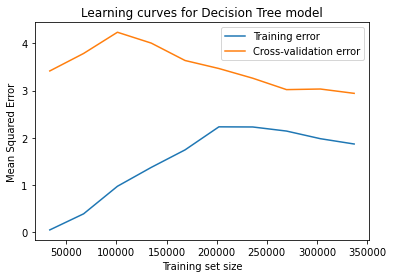

In [16]:
# Learning curve Decision Tree Model

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Define the decision tree model
dt = DecisionTreeRegressor(max_depth=10, random_state=42)

# Generate the learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt, X, y, cv=5, 
                                                        scoring='neg_mean_squared_error', 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curves
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training error')
plt.plot(train_sizes, -np.mean(test_scores, axis=1), label='Cross-validation error')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.title('Learning curves for Decision Tree model')
plt.legend()
plt.show()

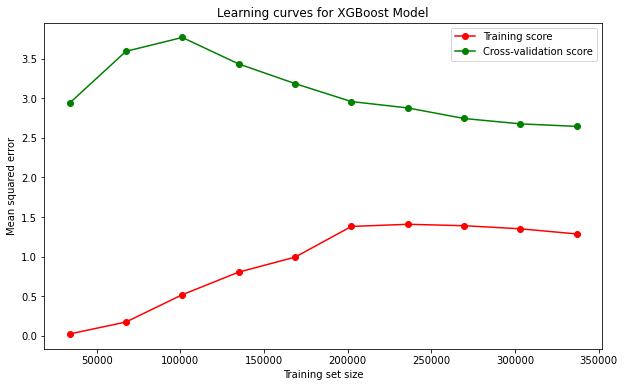

In [18]:
#Learning curve XGBoost Model (basic version)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb

# Create an instance of the XGBoost model with default hyperparameters
xgb_model = xgb.XGBRegressor()

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the XGBoost model
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for XGBoost Model')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()


In [19]:
# Hyperparameter tuning on XGBoost: Random Search CV=5 

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the hyperparameter search space:
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
}

# Create an instance of the XGBoost model
xgb_model = xgb.XGBRegressor()

# Set up the Randomized Search:
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of hyperparameter combinations to sample
    #n_iter = 3,   
    scoring = 'neg_mean_squared_error',
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,
    random_state=42,
)

# Fit the Randomized Search:
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model:

best_hyperparams = random_search.best_params_
best_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=300, subsample=1.0; total time=  58.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=400, subsample=0.9; total time=  27.9s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5, n_estimators=200, subsample=0.7; total time=  54.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.9; total time=  53.9s
[CV] END colsample_bytree=0.5, gamma=0.5, learning_rate=0.2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=  41.9s
[CV] END colsample_bytree=0.6, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.5; total time=  21.7s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.3

In [22]:
print(best_hyperparams)
print(best_model)

{'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 4, 'max_depth': 8, 'learning_rate': 0.5, 'gamma': 0.4, 'colsample_bytree': 0.5}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=400, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [25]:
# Use the best model to make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the mean squared error and R-squared score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Model (after Random Search):")
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Best Model (after Random Search):
Mean Squared Error: 0.94
R-squared: 0.72


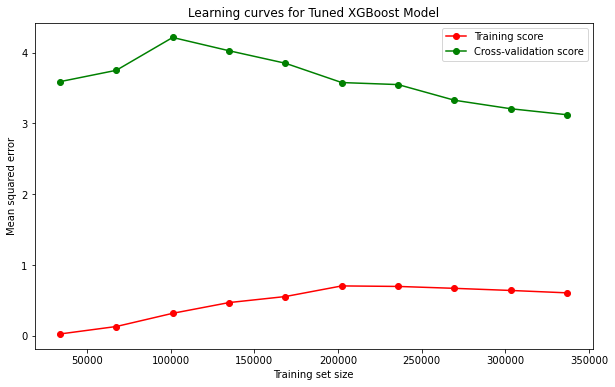

In [27]:
## Learning curve for XGBoost with hyperparameter tuning RANDOMSEARCH
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb


# Create an instance of the XGBoost model with the tuned hyperparameters
tuned_xgb_model = xgb.XGBRegressor(subsample=0.8, n_estimators=400, min_child_weight=4, max_depth=8, learning_rate=0.5, gamma=0.4, colsample_bytree=0.5)

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the tuned XGBoost model
train_sizes, train_scores, test_scores = learning_curve(tuned_xgb_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Tuned XGBoost Model')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()


In [28]:
##### XGBoost: hyperparameter tuning with GRIDSEARCH
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the XGBoost model
xgb_model = xgb.XGBRegressor()

# Define the hyperparameters search space
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
    'gamma': [0, 0.1, 0.2]
}

# Create the GridSearchCV object with the XGBoost model and the hyperparameters search space
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the GridSearchCV
best_xgb_model = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Calculate the mean squared error and R-squared score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best XGBoost Model:")
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))
print("Best hyperparameters: ", grid_search.best_params_)


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   8.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  15.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  11.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  22.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  13.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  10.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  22.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, m

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   8.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  15.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  11.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  22.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  14.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  13.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  29.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  50.0s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   8.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  18.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  14.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  27.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  12.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  11.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  29.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  35.3s
[C

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   7.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   6.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  18.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  24.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  13.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  11.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  22.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=  19.1s
[

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   7.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   6.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  18.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  24.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  18.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  11.5s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  23.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  34.7s
[CV

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   7.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   6.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  14.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  21.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  22.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  13.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  27.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  36.2s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   8.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  15.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  12.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  19.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  19.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  11.4s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  23.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=  18.8s
[CV] E

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.75; total time=  16.9s[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   7.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   6.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  14.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  21.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  20.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  13.8s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  24.2s


[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   8.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  15.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  15.3s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  21.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  13.1s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=   9.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  23.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=  28.4s
[CV] 

[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   7.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   6.7s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  14.0s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  24.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  19.9s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  12.2s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  27.6s
[CV] END colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  36.8s
[CV

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   7.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  17.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  24.4s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  25.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  16.4s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  14.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.5; total time=  31.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1; total time=  38

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.75; total time=  29.9s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1; total time=  28.8s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.75; total time=  49.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.5; total time=   9.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.75; total time=   8.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   7.7s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  16.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  29.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  28.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1; total time=  32.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  20.4s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  33.7s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  45.4s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=  38.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.75; total time=  

[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.5; total time=  52.5s
[CV] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1; total time=  41.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   7.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  18.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.75; total time=  17.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.75; total time=  38.5s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  15.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time= 

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   8.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.5; total time=  18.2s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=  14.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.5; total time=  40.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=  22.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  14.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  29.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  45.

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.75; total time=  13.7s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1; total time=  12.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.75; total time=  29.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.5; total time=  44.7s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1; total time=  38.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.75; total time=  20.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1; total time=  19.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.75; total time=  


[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1; total time=  13.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.75; total time=  31.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.5; total time=  18.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1; total time=  13.3s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.75; total time=  28.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1; total time=  30.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.75; total time=  42.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.5; total time=  

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1; total time=  24.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.75; total time=  16.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.5; total time=  37.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1; total time=  25.2s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.75; total time=  47.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.5; total time=  21.5s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1; total time=  19.0s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.75; total time=  4

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.5; total time=  45.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1; total time=  39.2s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.75; total time=  24.6s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.75; total time=  59.5s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.5; total time= 1.1min
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1; total time= 1.1min
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=  27.4s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=  23.2

[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1; total time=  19.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.75; total time=  38.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.5; total time= 1.2min
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1; total time=  53.2s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.5; total time=  20.1s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.5; total time=  29.9s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1; total time=  22.8s
[CV] END colsample_bytree=0.75, gamma=0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.75; total time=  16.0s


Best XGBoost Model:
Mean Squared Error: 1.28
R-squared: 0.62
Best hyperparameters:  {'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.75}


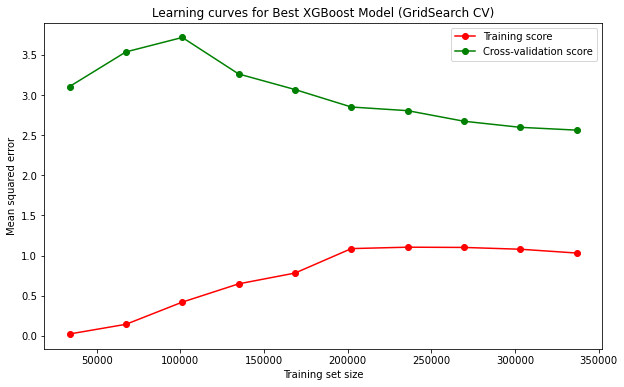

In [32]:
# Learning curve for XGBoost + GridSearch 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import xgboost as xgb


# Create an instance of the XGBoost model with the tuned hyperparameters
tuned_xgb_model = xgb.XGBRegressor(colsample_bytree =1, gamma =0.2, learning_rate = 0.1, max_depth = 7, n_estimators =300, subsample = 0.75)

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the tuned XGBoost model
train_sizes, train_scores, test_scores = learning_curve(tuned_xgb_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Best XGBoost Model (GridSearch CV)')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()

In [ ]:
#Linear Regression with means! 

# Split the data into training and testing sets

y_mean = np.mean(y)
print(y_mean)
y_single = np.full_like(y, y_mean)  # create an array of y_mean with the same shape as y
X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

# Instantiate a linear regression model
lr = LinearRegression()

# Fit the linear regression model on the training data
lr.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Convert the predicted value to the original scale
y_pred_mean = y_pred.mean() * np.ones(y.shape)  # convert the predicted value to the original scale

# Evaluate the performance of the model on the original scale
mse_mean = mean_squared_error(y, y_pred_mean)
r2_mean = r2_score(y, y_pred_mean)

print("Mean Squared Error (mean):", mse_mean)
print("R-squared (mean):", r2_mean)


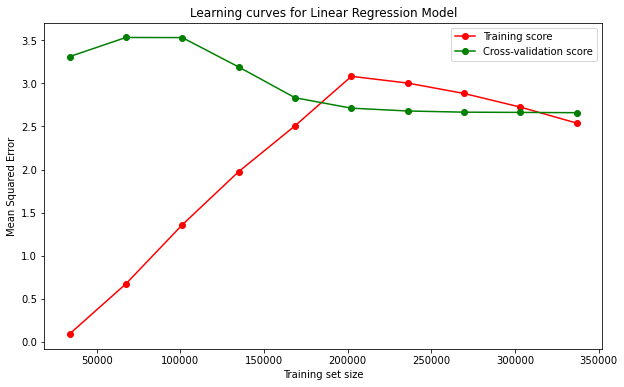

In [35]:
### Learning Curve for the regression model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

# Create an instance of the Linear Regression model
lr_model = LinearRegression()

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the Linear Regression model
train_sizes, train_scores, test_scores = learning_curve(lr_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Linear Regression Model')
plt.xlabel('Training set size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')
plt.show()


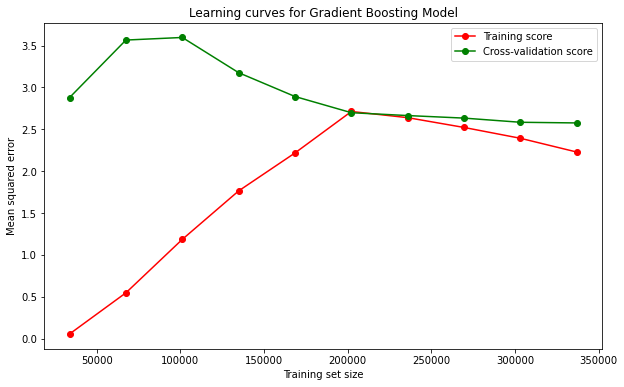

In [37]:
### Learning curve for Gradient Boosting Model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import learning_curve

# Convert y to a 1d array using ravel()
y = np.ravel(y)

# Create an instance of the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the Gradient Boosting model
train_sizes, train_scores, test_scores = learning_curve(gb_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Gradient Boosting Model')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()


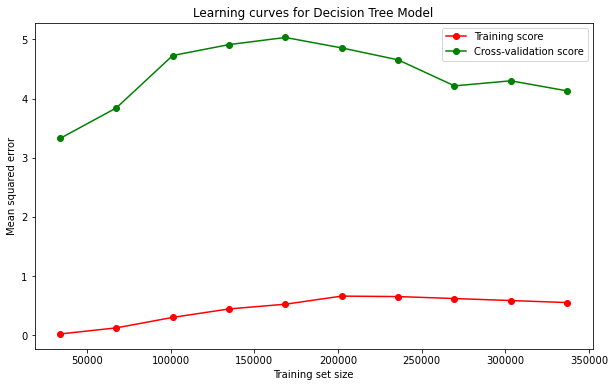

In [38]:
# Learning curve for the Decision Tree model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve

# Convert y to a 1d array using ravel()
y = np.ravel(y)

# Create an instance of the Decision Tree model
tree_model = DecisionTreeRegressor()

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the Decision Tree model
train_sizes, train_scores, test_scores = learning_curve(tree_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Decision Tree Model')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()


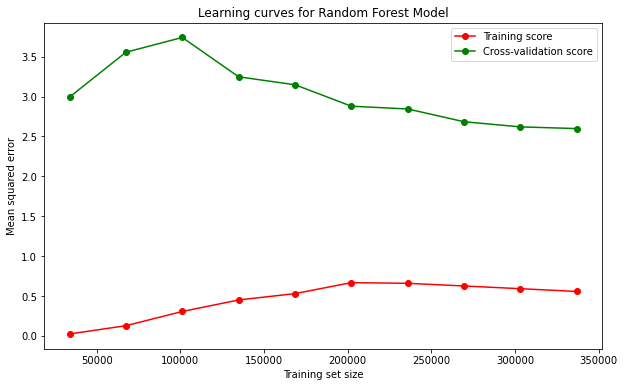

In [40]:
### Learning curve for the Random Forest Model 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve

# Convert y to a 1d array using ravel()
y = np.ravel(y)

# Create an instance of the Random Forest model
rf_model = RandomForestRegressor()

# Define the range of training set sizes to use
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve for the Random Forest model
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, train_sizes=train_sizes, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Calculate the mean and standard deviation of the cross-validated training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.title('Learning curves for Random Forest Model')
plt.xlabel('Training set size')
plt.ylabel('Mean squared error')
plt.legend(loc='best')
plt.show()
